# Maximum likelihood

In Bayesian modelling, the **likelihood**, $L$, is the name given to the measure of the goodness of fit between the model, with some given variables, and the data. 
When the likelihood is maximised, $\hat{L}$, the most probable statistical model has been found for the given data. 

In this tutorial we will see how `uravu` can be used to maximize the likelihood of a model for some dataset.

In `uravu`, when the sample is normally distributed the likelihood is calculated as follows, 

$$ \ln L = -0.5 \sum_{i=1}^n \bigg[ \frac{(y_i - m_i) ^2}{\delta y_i^2} + \ln(2 \pi \delta y_i^2) \bigg], $$

where, $y$ is the data ordinate, $m$ is the model ordinate, and $\delta y_i$ is uncertainty in $y$.
`uravu` is able to maximize this function using the [scipy.optimize.minimize()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function (we minimize the negative of the likelihood).

Before we maximise the likelihood, is it necessary to create some *synthetic* data to analyse. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from uravu import plotting
from uravu.relationship import Relationship

In [2]:
np.random.seed(1)

In [3]:
x = np.linspace(0, 10, 20)
y = np.exp(0.5 * x) * 4
y += y * np.random.randn(20) * 0.1
dy = y * 0.2

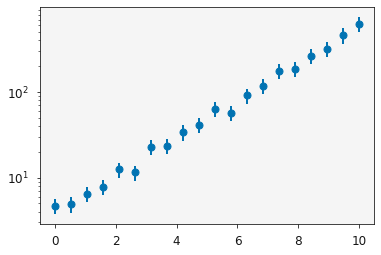

In [4]:
plt.errorbar(x, y, dy, marker='o', ls='')
plt.yscale('log')
plt.show()

The data plotted above (note the logarthimic $y$-axis) may be modelled with the following relationship, 

$$ y = a\exp(bx), $$

where $a$ and $b$ are the variables of interest in the modelling process. 
We want to find the values for these variables, which maximises the likelihood. 

First, we must write a function to describe the model (more about the function specification can be found in teh [Input functions](./input_functions.html) tutorial).

In [5]:
def my_model(x, a, b):
    """
    A function to describe the model under investgation.
    
    Args:
        x (array_like): Abscissa data.
        a (float): The pre-exponential factor.
        b (float): The x-multiplicative factor.
    
    Returns
        y (array_like): Ordinate data.
    """
    return a * np.exp(b * x)

With our model defined, we can construct a `Relationship` object. 

In [6]:
modeller = Relationship(my_model, x, y, ordinate_error=dy)

The `Relationship` object gives us access to a few powerful Bayesian modelling methods.
However, this tutorial is focused on maximising the likelihood, this is achieved with the `max_likelihood()` class method, where the keyword `'mini'` indicates the standard [scipy.optimize.minimize()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function should be used. 

In [7]:
modeller.max_likelihood('mini')

In [8]:
print(modeller.variable_modes)

[4.55082086 0.46090669]


We can see that the variables are close to the values used in the data synthesis. 
Note, that here `variable_modes` are in fact the variable values that maximise the likelihood.

Let's inspect the model visually. 
This can be achieved easily with the `plotting` module in `uravu`.

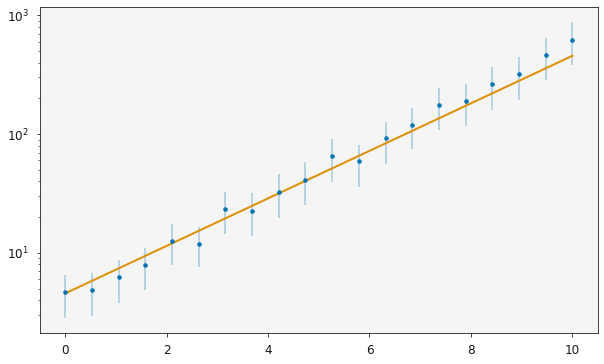

In [9]:
ax = plotting.plot_relationship(modeller)
plt.yscale('log')
plt.show()

Above, we can see that the orange line of maximum likelihood agrees well with the data. 